In [12]:
import pandas as pd
# Cargar los datos
df = pd.read_csv('prueba_piloto2.csv', encoding='latin-1')  # Se especifica la codificación latin-1
df.head()  # Ver las primeras filas del dataset

,Rol,Género,Edad,Años en la institución,Área o Departamento,Carrera,Ambiente seguro,Testigo de violencia,Frecuencia de violencia,Violencia fí1ca,Acoso sexual,Violencia verbal,Reporte incidente,Acción de la institución,Programas preventivos,Más medidas de seguridad,Desvalorización de su trabajo,Sobrecarga intencional de trabajos,difamación dentro de la institución,humillación pública
0,1,1,1,3,4,1,2,1,3,2,1,1,2,0,3,1,1,2,1,1
1,1,2,1,2,4,7,1,1,4,1,1,1,2,0,3,2,1,2,1,1
2,1,2,1,1,4,7,2,1,3,2,2,2,2,0,1,1,2,2,2,1
3,1,1,1,2,4,5,1,1,3,1,2,1,1,2,3,1,1,2,1,2
4,2,2,3,4,3,11,1,1,4,1,2,2,1,1,1,1,2,1,2,1


In [14]:
# PASO 2: Preprocesamiento de los datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Crear una nueva variable binaria que combine todas las formas de violencia
df['Violencia_general'] = ( # Changed 'data' to 'df'
    (df['Violencia fí1ca'] == 1) | # Changed 'data' to 'df'
    (df['Acoso sexual'] == 1) | # Changed 'data' to 'df'
    (df['Violencia verbal'] == 1) | # Changed 'data' to 'df'
    (df[' difamación dentro de la institución'] == 1) | # Changed 'data' to 'df'
    (df['humillación pública'] == 1) | # Changed 'data' to 'df'
    (df['Desvalorización de su trabajo'] == 1) | # Changed 'data' to 'df'
    (df['Sobrecarga intencional de trabajos'] == 1)
).astype(int)

In [16]:
# Eliminar las columnas de violencia individuales y usar "Violencia_general" como objetivo
X = df.drop(columns=['Violencia fí1ca', 'Violencia_general'])
y = df['Violencia_general']

In [17]:
# Dividir en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
# PASO 3: Entrenar la Red Neuronal Densa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


In [20]:
# Crear el modelo de red neuronal densa
model_dense = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Salida binaria
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compilar el modelo
model_dense.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
# Entrenar el modelo
history_dense = model_dense.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Hacer predicciones
y_pred_dense = (model_dense.predict(X_test_scaled) > 0.5).astype("int32")


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8382 - loss: 0.5025 - val_accuracy: 0.9773 - val_loss: 0.1972
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9829 - loss: 0.1525 - val_accuracy: 0.9773 - val_loss: 0.1146
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9889 - loss: 0.0722 - val_accuracy: 0.9773 - val_loss: 0.0981
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - loss: 0.0539 - val_accuracy: 0.9773 - val_loss: 0.0884
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9797 - loss: 0.0693 - val_accuracy: 0.9773 - val_loss: 0.0793
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9840 - loss: 0.0518 - val_accuracy: 0.9773 - val_loss: 0.0743
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9841 - loss: 0.0453 - val_accuracy: 0.9773 - val_loss: 0.0683
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9869 - loss: 0.0345 - val_accuracy: 0.9773 - val_loss

In [23]:
# Calcular las métricas
accuracy_dense = accuracy_score(y_test, y_pred_dense)
precision_dense = precision_score(y_test, y_pred_dense)
recall_dense = recall_score(y_test, y_pred_dense)
f1_dense = f1_score(y_test, y_pred_dense)
roc_auc_dense = roc_auc_score(y_test, y_pred_dense)

In [24]:
# Mostrar los resultados
print(f"Accuracy: {accuracy_dense}")
print(f"Precision: {precision_dense}")
print(f"Recall: {recall_dense}")
print(f"F1-Score: {f1_dense}")
print(f"AUC-ROC: {roc_auc_dense}")


Accuracy: 0.9863636363636363
Precision: 0.9907834101382489
Recall: 0.9953703703703703
F1-Score: 0.9930715935334873
AUC-ROC: 0.7476851851851851


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


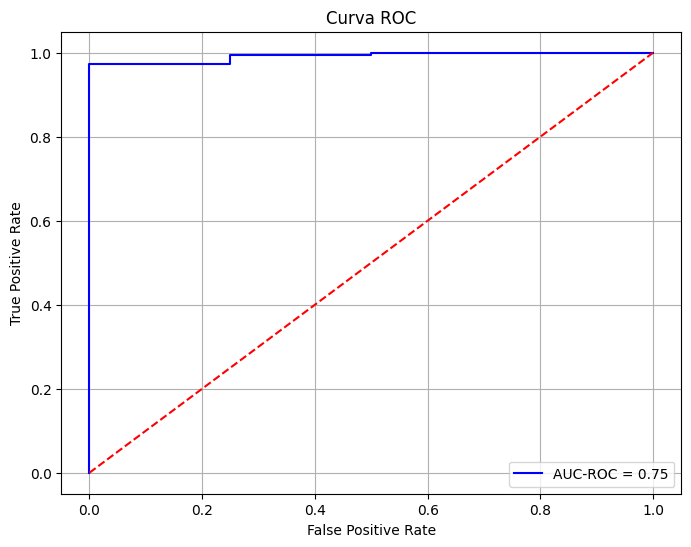

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calcular la probabilidad de predicción para la curva ROC
y_pred_prob_dense = model_dense.predict(X_test_scaled)

# Obtener los valores de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dense)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {roc_auc_dense:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()


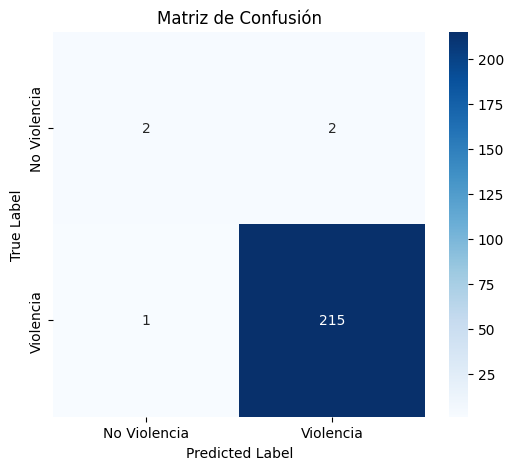

In [28]:
# PASO 5: Calcular y graficar la Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_dense)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Violencia', 'Violencia'], yticklabels=['No Violencia', 'Violencia'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Matriz de Confusión')
plt.show()